In [1]:
import giraffe
import matplotlib.pyplot as plt
import notebooks
import numpy as np
import pandas as pd
import seaborn as sn

### Liver

In [2]:
expression = pd.read_csv("data/liver/raw/expression.csv", index_col = 0)
motif = pd.read_csv("data/liver/motif.csv", index_col = 0)
ppi = pd.read_csv("data/liver/ppi_matrix.csv", index_col = 0)

In [17]:
e = expression.to_numpy()
row_variances = np.var(e, axis=1)

top_indices = np.argsort(row_variances)[-10000:]

# Select the top 100 rows
e = e[top_indices]

In [3]:
from sklearn.preprocessing import normalize
E = normalize(expression.to_numpy(), axis=0, norm='max')

In [4]:
R = giraffe.Giraffe(E, motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True).get_regulation()
R = pd.DataFrame(R, index = motif.index, columns = motif.columns)

200


In [18]:
R = giraffe.Giraffe(e, motif.to_numpy()[top_indices], ppi.to_numpy() + np.eye(ppi.shape[0])).get_regulation()
R = pd.DataFrame(R, index = motif.index[top_indices], columns = motif.columns)

In [5]:
# interventions = ['DROSHA', 'RBM14', 'SRSF4', 'SRSF7'] #CRISPR
interventions = ['HNF1A', 'WT1', 'HIF1A', 'HSF1', 'STAT3', 'CEBPZ']
interventions = ["ARID2", "FOXA2", "CTCF", "E4F1", "SMAD2", "SMAD4", "SMAD5", "YBX1"]

In [11]:
translation = pd.read_csv("data/liver/raw/gen_v26_mapping.csv")
def intervention_score(intervention_name):
    bpath = "data/liver/raw/"
    intervention = pd.read_csv(bpath + intervention_name + '.csv')
    intervention = intervention[intervention["P-value"] <= 0.05][['Target Gene', 
                                 'Mean                                         Expr. of                                         Control', 
                                 'Mean                                         Expr. of                                              Treat'
                                ]].iloc[0:100, :]
    #intervention = pd.read_csv(bpath + intervention_name + '.csv')[['Target Gene', 'Mean Expr. of Control', 'Mean Expr. of Treat']].iloc[1:1000, :]
    intervention['diff'] = intervention[intervention.columns[1]] > intervention[intervention.columns[2]]
    if intervention.shape[0] == 0:
        return
    score = 0
    tot = 0
    mm = 0
    mp = 0
    pm = 0
    pp = 0
    for i in range(intervention.shape[0]):
        gene = intervention.iloc[i]['Target Gene']
        trans = list(translation[translation['gene_name'] == gene]['gene_id'])
        if len(trans) == 0:
            continue
        gene = trans[0][0:15]
        if gene not in expression.index or gene not in R.index:
            continue
        tot += 1
        if R.loc[gene, intervention_name] > 0:
            if intervention.iloc[i]['diff']:
                pp += 1
                score += 1
            else:
                pm += 1
        else:
            if not intervention.iloc[i]['diff']:
                mm += 1
                score += 1
            else:
                mp += 1
    sn.heatmap(data = [[pp, pm], [mp, mm]], annot = True)
    plt.show()
    print(intervention_name + " accuracy: " + str(score / tot))

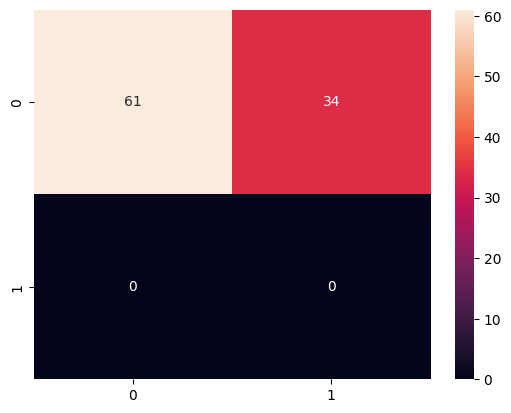

ARID2 accuracy: 0.6421052631578947


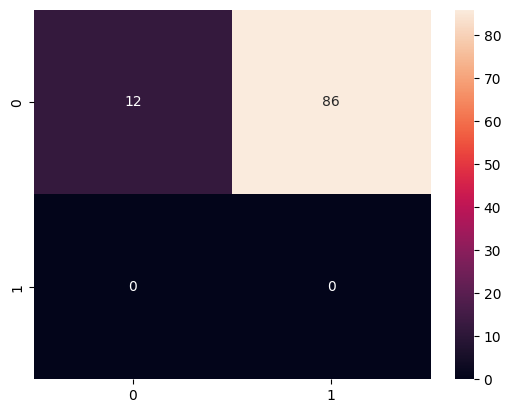

FOXA2 accuracy: 0.12244897959183673


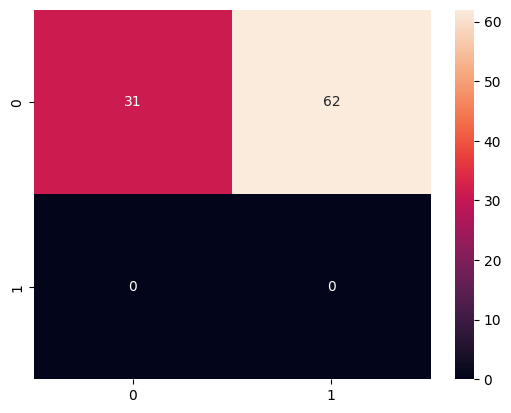

CTCF accuracy: 0.3333333333333333


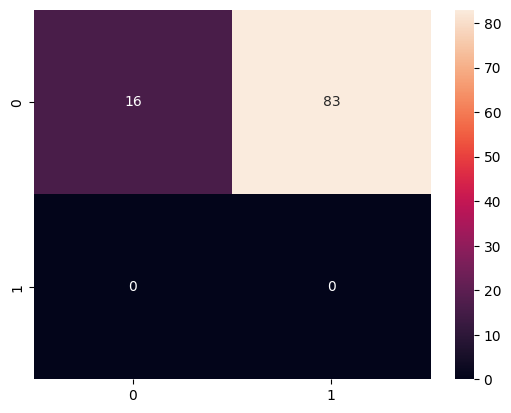

E4F1 accuracy: 0.16161616161616163


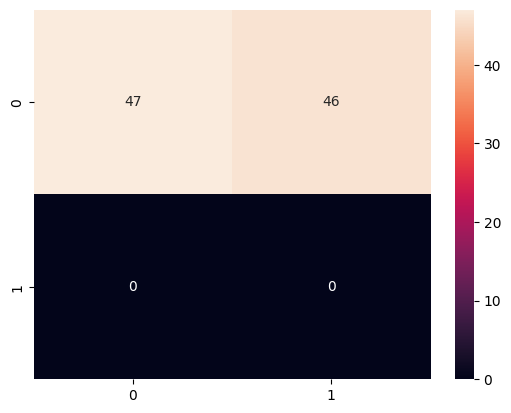

SMAD2 accuracy: 0.5053763440860215


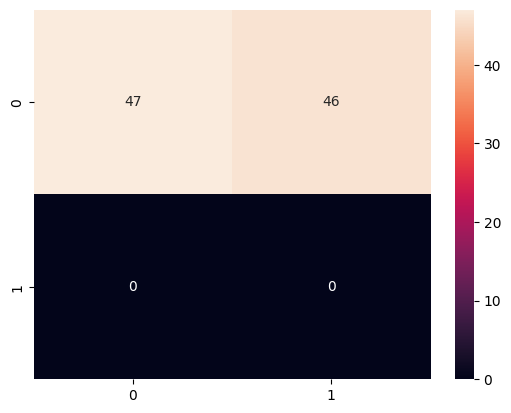

SMAD4 accuracy: 0.5053763440860215


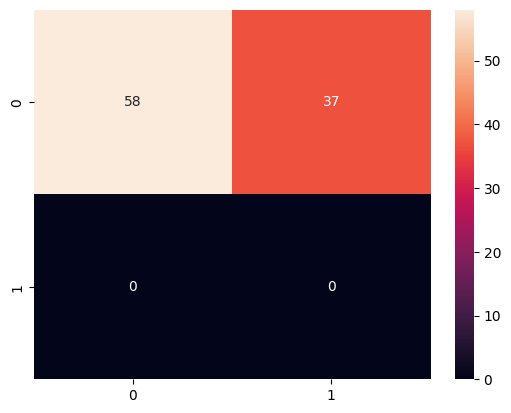

SMAD5 accuracy: 0.6105263157894737


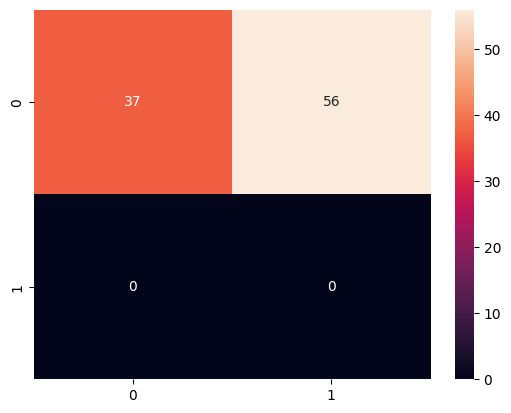

YBX1 accuracy: 0.3978494623655914


In [12]:
# GIRAFFE
for intervention in interventions:
    intervention_score(intervention)

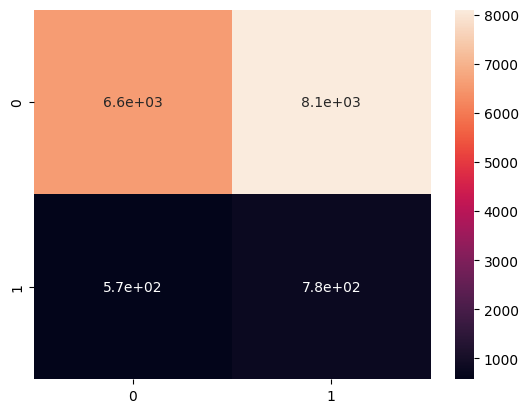

HNF1A accuracy: 0.4591308685080117


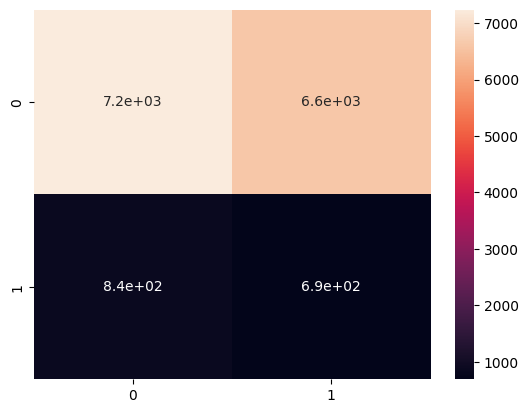

WT1 accuracy: 0.5156422764227643


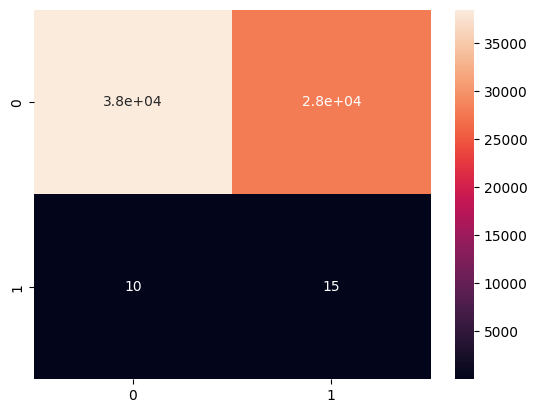

HIF1A accuracy: 0.5794074208035688


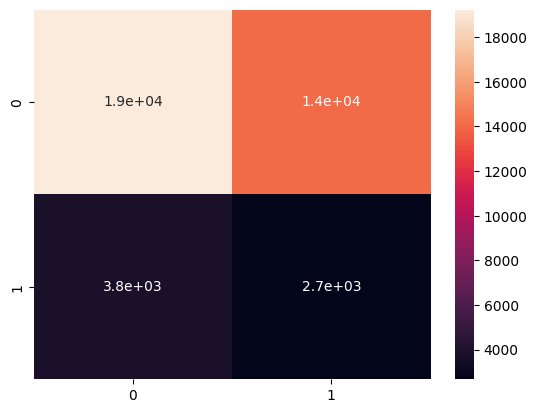

HSF1 accuracy: 0.550027625696921


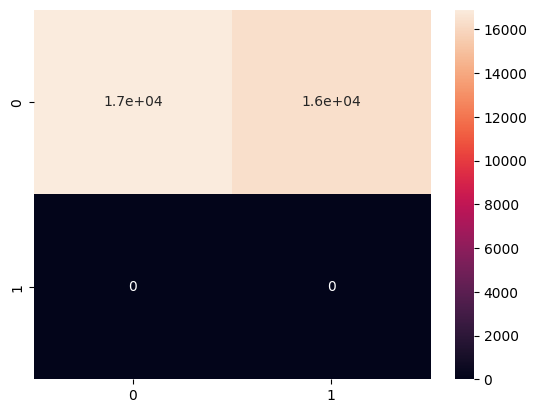

STAT3 accuracy: 0.5088347731856356


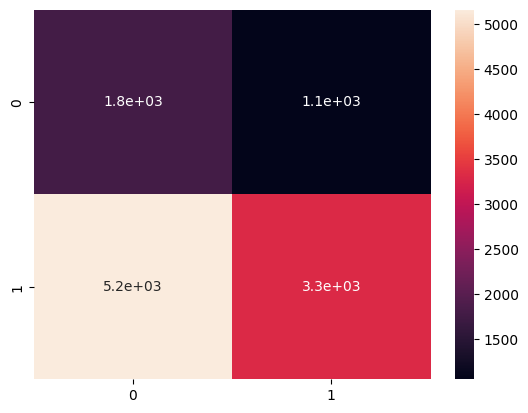

CEBPZ accuracy: 0.4504019079586609


In [6]:
# GIRAFFE
for intervention in interventions:
    intervention_score(intervention)

### Lung

In [11]:
expression = pd.read_csv("data/lung/raw/expression.csv", index_col = 0)
motif = pd.read_csv("data/lung/motif.csv", index_col = 0)
ppi = pd.read_csv("data/lung/ppi_matrix.csv", index_col = 0)

In [27]:
R = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True).get_regulation()
R = pd.DataFrame(R, index = motif.index, columns = motif.columns)

200


In [28]:
interventions = ['TP53', 'STAT6', 'NFE2L2', 'YBX1', 'NKX2-1', 'GABPA', 'ETS2', 'NFYA', 'RELB', 'TFAP2C']
interventions = ['NFE2L1']

In [43]:
translation = pd.read_csv("data/liver/raw/gen_v26_mapping.csv")
def intervention_score(intervention_name):
    bpath = "data/lung/raw/"
    intervention = pd.read_csv(bpath + intervention_name + '.csv')
    intervention = intervention[intervention["P-value"] < .05][['Target Gene', 
                                 'Mean                                         Expr. of                                         Control', 
                                 'Mean                                         Expr. of                                              Treat'
                                ]]
    intervention['diff'] = intervention[intervention.columns[1]] > intervention[intervention.columns[2]]
    score = 0
    tot = 0
    mm = 0
    mp = 0
    pm = 0
    pp = 0
    for i in range(intervention.shape[0]):
        gene = intervention.iloc[i]['Target Gene']
        trans = list(translation[translation['gene_name'] == gene]['gene_id'])
        if len(trans) == 0:
            continue
        gene = trans[0][0:15]
        if gene not in expression.index:
            continue
        tot += 1
        if R.loc[gene, intervention_name] > 0:
            if intervention.iloc[i]['diff']:
                pp += 1
                score += 1
            else:
                pm += 1
        else:
            if not intervention.iloc[i]['diff']:
                mm += 1
                score += 1
            else:
                mp += 1
    sn.heatmap(data = [[pp, pm], [mp, mm]], annot = True)
    plt.show()
    print(intervention_name + " accuracy: " + str(score / tot))

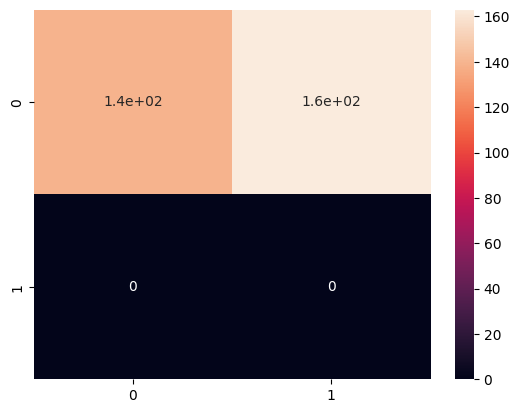

NFE2L1 accuracy: 0.4602649006622517


In [44]:
# GIRAFFE
for intervention in interventions:
    intervention_score(intervention)

### Pancreas

In [2]:
gtex = pd.read_csv("data/onco_tsg/raw/xprs_panc_gtex_snail.tsv", sep = '\t', index_col = 0)
genes = [gene[0:15] for gene in gtex.index]
gtex = pd.DataFrame(gtex.to_numpy(), index = genes, columns = gtex.columns)
motif = pd.read_csv("data/onco_tsg/motif.txt", index_col = 0)
ppi = pd.read_csv("data/onco_tsg/ppi.csv", index_col = 0)

In [8]:
giraffe_gtex = giraffe.Giraffe(gtex.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation=True).get_regulation()

200


In [4]:
intervention = pd.read_csv("data/onco_tsg/raw/ZIC2.csv")[['Target Gene', 'Mean Expr. of Control', 'Mean Expr. of Treat']]
translate = pd.read_csv("data/onco_tsg/raw/gen_v26_mapping.csv")
intervention['diff'] = intervention[intervention.columns[1]] > intervention[intervention.columns[2]]

In [5]:
def intervention_score(tf):
    tf_index = list(motif.columns).index(tf)
    score = 0
    tot = 0
    a = 0
    b = 0
    aa = 0
    bb = 0
    for i in range(intervention.shape[0]):
        gene = intervention.iloc[i]['Target Gene']
        if intervention['Target Gene'][i] not in set(translate['gene_name']):
            continue
        translation = translate[translate['gene_name'] == intervention['Target Gene'][i]]['gene_id'].values[0][0:15]
        if translation not in gtex.index:
            continue
        tot += 1
        if giraffe_gtex[list(gtex.index).index(translation), tf_index] > 0:
            a += 1
            if intervention.iloc[i]['diff']:
                aa += 1
                score += 1
        else:
            b += 1
            if not intervention.iloc[i]['diff']:
                bb += 1
                score += 1
    return score / tot

In [9]:
interventions = ['HOXB7', 'FOXO3', 'ZIC2']
for j in interventions:
    print(intervention_score(j))

0.3510005408328826
0.4774781735300935
0.4819593602719617
